<a href="https://colab.research.google.com/github/desaiankitb/pytorch-basics/blob/main/Introduction_to_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Simple Regression Problem
## a linear regression with a single feature x! It doesn’t get much simpler than that… 
### Lets get started with *Data Generation*

# Generating some synthetic data

In [1]:
import numpy as np
# Data Generation
np.random.seed(42)
x = np.random.rand(100, 1)
y = 1 + 2 * x + .1 * np.random.randn(100, 1)

In [2]:
len(x), len(y)

(100, 100)

In [3]:
# Shuffles the indices
idx = np.arange(100)
np.random.shuffle(idx)

In [4]:
idx

array([76, 83, 80, 98,  2, 77, 71, 84, 89, 50, 40, 51, 67, 86, 37, 49,  4,
       10, 69, 81,  9, 54, 55, 87, 64, 44, 90, 75, 33, 30, 93, 95, 14, 61,
       11, 13, 15,  7,  0, 19, 35,  6, 12, 65, 70, 88, 56, 58, 28, 38, 91,
       42,  8, 73, 39, 85, 25, 92, 41, 26,  1, 22, 21, 46, 74, 79, 78, 72,
       57, 53, 24, 17, 66, 32, 31, 62, 59, 52, 82, 23, 36,  5, 45, 99, 43,
       16, 48, 94, 34,  3, 18, 47, 60, 68, 63, 27, 96, 29, 20, 97])

In [5]:
# Uses first 80 random indices for train
train_idx = idx[:80]
# Uses the remaining indices for validation
val_idx = idx[80:]

In [6]:
len(train_idx), len(val_idx)

(80, 20)

In [7]:
# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

Text(0.5, 1.0, 'Generated Data - Train')

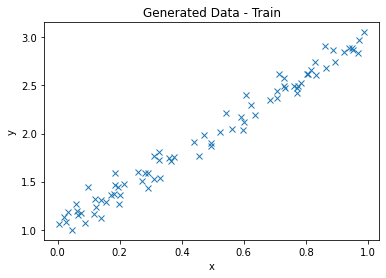

In [8]:
#vizualise the generated data using matplotlib
import matplotlib.pyplot as plt
plt.plot(x_train, y_train, 'x')
plt.ylabel('y')
plt.xlabel('x')
plt.title('Generated Data - Train')

Text(0.5, 1.0, 'Generated Data - Test')

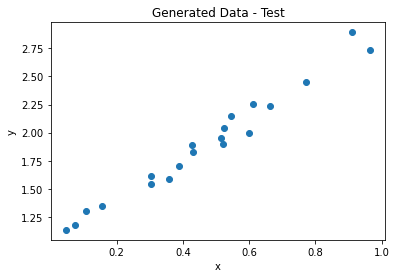

In [9]:
#vizualise the generated data using matplotlib - Test
plt.plot(x_val, y_val, 'o')
plt.ylabel('y')
plt.xlabel('x')
plt.title('Generated Data - Test')

- We know that `a = 1` and `b = 2`, but now let’s see how close we can get to the true values by using **gradient descent** and the 80 points in the training set.

# Gradient Descent

[Self Study](https://medium.com/p/81fc5f8c4e8e#dc96)  ;)

# NumPy
## For training a model, there are two initialization steps:
* Random initialization of parameters/weights (we have only two, a and b) — lines 3 and 4;
* Initialization of hyper-parameters (in our case, only learning rate and number of epochs) — lines 9 and 11;
## For each epoch, there are four training steps:
* Compute model’s predictions — this is the forward pass — line 15;
* Compute the loss, using predictions and and labels and the appropriate loss function for the task at hand — lines 18 and 20;
* Compute the gradients for every parameter — lines 23 and 24;
* Update the parameters — lines 27 and 28;


In [10]:
# Initializes params "a" and "b" randomly 
np.random.seed(42)
a = np.random.randn(1)
b = np.random.randn(1)

print("# a and b after initialization\n", a, b)

# Sets learning rate
lr = 1e-1
# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
  # Computes our model's predicted output
  yhat = a + b * x_train

  # How wrong is our model? That's the error!
  error = (y_train - yhat)
  #It is a regression, so it computes mean squared error (MSE)
  loss = (error**2).mean()

  # Computes gradients for both "a" and "b" parameters 
  a_grad = -2 * error.mean()
  b_grad = -2 * (x_train * error).mean()

  # Updates parameters using gradients and the learning rate 
  a = a - lr * a_grad
  b = b - lr * b_grad

print("# a and b after our gradient descent\n", a, b)

# Sanity Check: do we get the same results as our gradient descent?
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(x_train, y_train)
print("# intercept and coef from Scikit-Learn\n", linr.intercept_, linr.coef_[0])

# a and b after initialization
 [0.49671415] [-0.1382643]
# a and b after our gradient descent
 [1.02354094] [1.96896411]
# intercept and coef from Scikit-Learn
 [1.02354075] [1.96896447]


#PyTorch 

## Tensor
- In *Numpy*, you may have an **array** that has **three dimensions**, right? That is, technically speaking, a tensor.

- A **scalar** (a single number) has zero dimensions, a **vector has one** dimension, a **matrix has two** dimensions and a **tensor has three or more** dimensions. That’s it!

- But, to keep things simple, it is commonplace to call vectors and matrices tensors as well — so, from now on, **everything is either a scalar or a tensor.**

In [11]:
!pip install torchviz

  Created wheel for torchviz: filename=torchviz-0.0.2-cp37-none-any.whl size=4152 sha256=0d47a9617eb9ba00d330081307331ade4e9a8f9e4f2ad20950f9ab91d9b512a2
  Stored in directory: /root/.cache/pip/wheels/01/26/58/026ffd533dbe8b3972eb423da9c7949beca68d1c98ed9e8624
Successfully built torchviz


In [12]:
#Loading data: turning Numpy arrays into PyTorch tensors
import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Our data was in Numpy arrays, but we need to transform them into PyTorch's 
# Tensors and then we send them to the chosen device 
x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)

# Here we can see the difference - notice that .type() is more useful
# since it also tells us WHERE the tensor is (device)
print(type(x_train), type(x_train_tensor), x_train_tensor.type())

<class 'numpy.ndarray'> <class 'torch.Tensor'> torch.cuda.FloatTensor


- If you compare the **types**  of both variables, you’ll get what you’d expect: `numpy.ndarray` for the first one and `torch.Tensor` for the second one.

- But where does your nice tensor “live”? In your CPU or your GPU? You can’t say... but if you use PyTorch’s `type()`, it will reveal its location — `torch.cuda.FloatTensor` — a GPU tensor in this case.

- We can also go the other way around, turning tensors back into Numpy arrays, using `numpy()`. It should be easy as `x_train_tensor.numpy()` but... 

`TypeError: can't convert CUDA tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.`

- Unfortunately, Numpy **cannot** handle GPU tensors… you need to make them CPU tensors first using `cpu()`.


## Creating Parameters

- What distinguishes a tensor used for data — like the ones we’ve just created — from a **tensor** used as a (trainable) **parameter/weight**?

- The latter tensors require the **computation of its gradients**, so we can **update** their values (the parameters’ values, that is). That’s what the **`requires_grad=True`** argument is good for. It tells PyTorch we want it to compute gradients for us.

- You may be tempted to create a simple tensor for a parameter and, later on, send it to your chosen device, as we did with our data, right? Not so fast... 

In [20]:
# If you are executing this in colab do the following configuration:
# goto: Runtime -> Change Runtime Type -> Notebook Settings -> 
# Change Hardware accelerator to GPU

# FIRST
# Initializes parameters "a" and "b" randomly, ALMOST as we did in Numpy
# since we want to apply gradient descent on these parameters, we need 
# to set REQUIRED_GRAD = TRUE
a = torch.randn(1, requires_grad=True, dtype=torch.float)
b = torch.randn(1, requires_grad=True, dtype=torch.float)
print("# FIRST")
print(a, b)
print(a.device, b.device)

# SECOND
# But what if we want to run it on a GPU? We could just send them to 
# device, right?
a = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
b = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
print("# SECOND")
print(a, b)
print(a.device, b.device)

# THIRD
# We can either create regular tensors and send them to the device 
# (as we did with our data)
a = torch.randn(1, dtype=torch.float).to(device)
b = torch.randn(1, dtype=torch.float).to(device)
print(a.device, b.device)
# and THEN set them as requiring gradients... 
a.requires_grad_()
b.requires_grad_()
print("# THIRD")
print(a, b)
print(a.device, b.device)

# FIRST
tensor([-0.1301], requires_grad=True) tensor([0.6757], requires_grad=True)
cpu cpu
# SECOND
tensor([-1.0085], device='cuda:0', grad_fn=<CopyBackwards>) tensor([-0.0556], device='cuda:0', grad_fn=<CopyBackwards>)
cuda:0 cuda:0
cuda:0 cuda:0
# THIRD
tensor([0.9106], device='cuda:0', requires_grad=True) tensor([-0.8224], device='cuda:0', requires_grad=True)
cuda:0 cuda:0


In [22]:
# to check nvidia based GPU details run following on commandline
!nvidia-smi

Wed Jun 23 09:08:11 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    30W /  70W |   1068MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## **Important Note:** In PyTorch, every method that **ends** with an **underscore (_)** makes changes **in-place**, meaning, they will **modify** the underlying variable.

- Although the last approach worked fine, it is much better to **assign** tensors to a **device** at the moment of their **creation** as follow. 

In [25]:
# We can specify the device at the moment of creation - RECOMMENDED!
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, '\n', b)

tensor([0.1940], device='cuda:0', requires_grad=True) 
 tensor([0.1391], device='cuda:0', requires_grad=True)


- Now that we know how to create tensors that require gradients, let’s see how PyTorch handles them — that’s the role of the **Autograd**